In [137]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rc
import daft
rc("font", family="serif", size=12)
rc("text", usetex=True)

# Colors.
t_color = {"ec": "#4682B4"}
p_color = {"ec": "#46a546"}
r_color = {"ec": "#f89406"}
colors = [t_color, p_color, r_color]
indices = ["j", "k", "l"]
labels = ["treatment", "peptide", "run"]
effects = [l[0] for l in labels]

In [138]:
# declare the shape and size, and various styling
w=25
h=15
h0=h/10
h1=h/2.2
h2=h/1.5
h3=h/1.1
n=5
sep=w/(n+1)
offset=2
pgm = daft.PGM(shape=[w, h], origin=[0, 0], grid_unit=1,
               label_params={'fontsize':18}, observed_style='shaded')

In [139]:
pgm.add_node(daft.Node("y", r"$y_{jkl}$", w/2, h0, scale=2, observed=True))
pgm.add_node(daft.Node("intercept", r"$\beta_0$", sep, h1, scale=2))
pgm.add_edge("intercept", "y")
pgm.add_node(daft.Node("hyper_intercept", "22", sep, h3, fixed=True))
pgm.add_edge("hyper_intercept", "intercept")

pgm.add_node(daft.Node("sigma", "$\sigma$", sep*5, h1))
pgm.add_edge("sigma", "y")
pgm.add_node(daft.Node("hyper_sigma", "1", sep*5, h3, fixed=True))
pgm.add_edge("hyper_sigma", "sigma")

In [140]:
[pgm.add_node(daft.Node("beta_{}".format(e), r"$\beta^{}_{}$".format(e, indices[i]), (i+offset)*sep, h1, scale=2, plot_params=colors[i])) for i, e in enumerate(effects)]
[pgm.add_edge("beta_{}".format(e), "y") for e in effects]

In [141]:
[pgm.add_node(daft.Node("mu_{}".format(e), r"$\mu^{}$".format(e), (i+offset)*sep - 1, h2, plot_params=colors[i])) for i, e in enumerate(effects)]
[pgm.add_node(daft.Node("sigma_{}".format(e), r"$\sigma^{}$".format(e), (i+offset)*sep + 1, h2, plot_params=colors[i])) for i, e in enumerate(effects)]
[pgm.add_edge("mu_{}".format(e), "beta_{}".format(e)) for e in effects]
[pgm.add_edge("sigma_{}".format(e), "beta_{}".format(e)) for e in effects]
[pgm.add_edge("sigma_{}".format(e), "mu_{}".format(e)) for e in effects]

In [142]:
[pgm.add_node(daft.Node("hyper_mu_{}".format(e), "0", (i+offset)*sep-1, h3, fixed=True)) for i, e in enumerate(effects)]
[pgm.add_edge("hyper_mu_{}".format(e), "mu_{}".format(e)) for e in effects]
[pgm.add_node(daft.Node("hyper_sigma_{}".format(e), "1", (i+offset)*sep+1, h3, fixed=True)) for i, e in enumerate(effects)]
[pgm.add_edge("hyper_sigma_{}".format(e), "sigma_{}".format(e)) for e in effects]

In [143]:
[pgm.add_plate(daft.Plate(rect=[.5*sep + (i+1)*sep, h1*.8, sep*0.95, (h2-h1*.80) + (h3-h2)/2],
#                           label=r"{} ${}$".format(labels[i], indices[i]),
#                           label_offset=(w*(sep*0.5), h*(h-h1*.85+h/10)),
                          rect_params={"color": "#ffffff"})) for i in range(len(effects))]

[None, None, None]

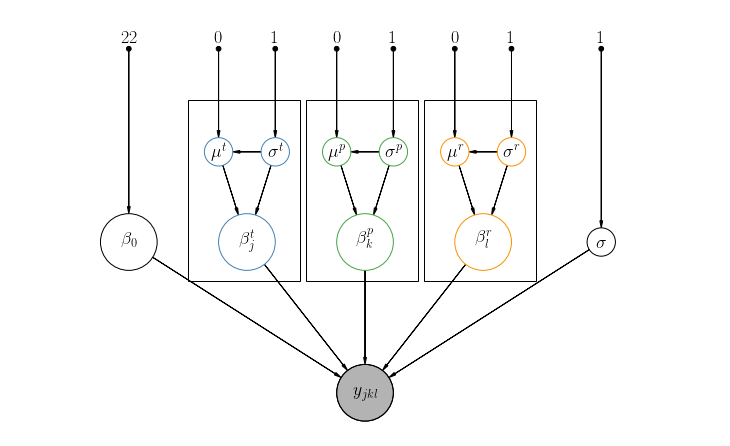

In [144]:
pgm.render()
plt.show()

In [145]:
pgm.figure.savefig("graph.pdf")
pgm.figure.savefig("graph.png", dpi=150)